# San Diego Burrito Analytics: Correlations

Scott Cole

21 May 2016

This notebook investigates the correlations between different burrito measures.

### imports

In [1]:
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import pandas as pd

import seaborn as sns
sns.set_style("white")

### Load data

In [2]:
import util
df = util.load_burritos()
N = df.shape[0]

# Correlation matrix
Note that many dimensions of the burrito are correlated with each other. This lack of independence across dimensions means we should be careful while interpreting the presence of a correlation between two dimensions.

In [3]:
m_corr = ['Google','Yelp','Hunger','Cost','Volume','Tortilla','Temp','Meat','Fillings','Meat:filling',
               'Uniformity','Salsa','Synergy','Wrap','overall']
M = len(m_corr)
dfcorr = df[m_corr].corr()

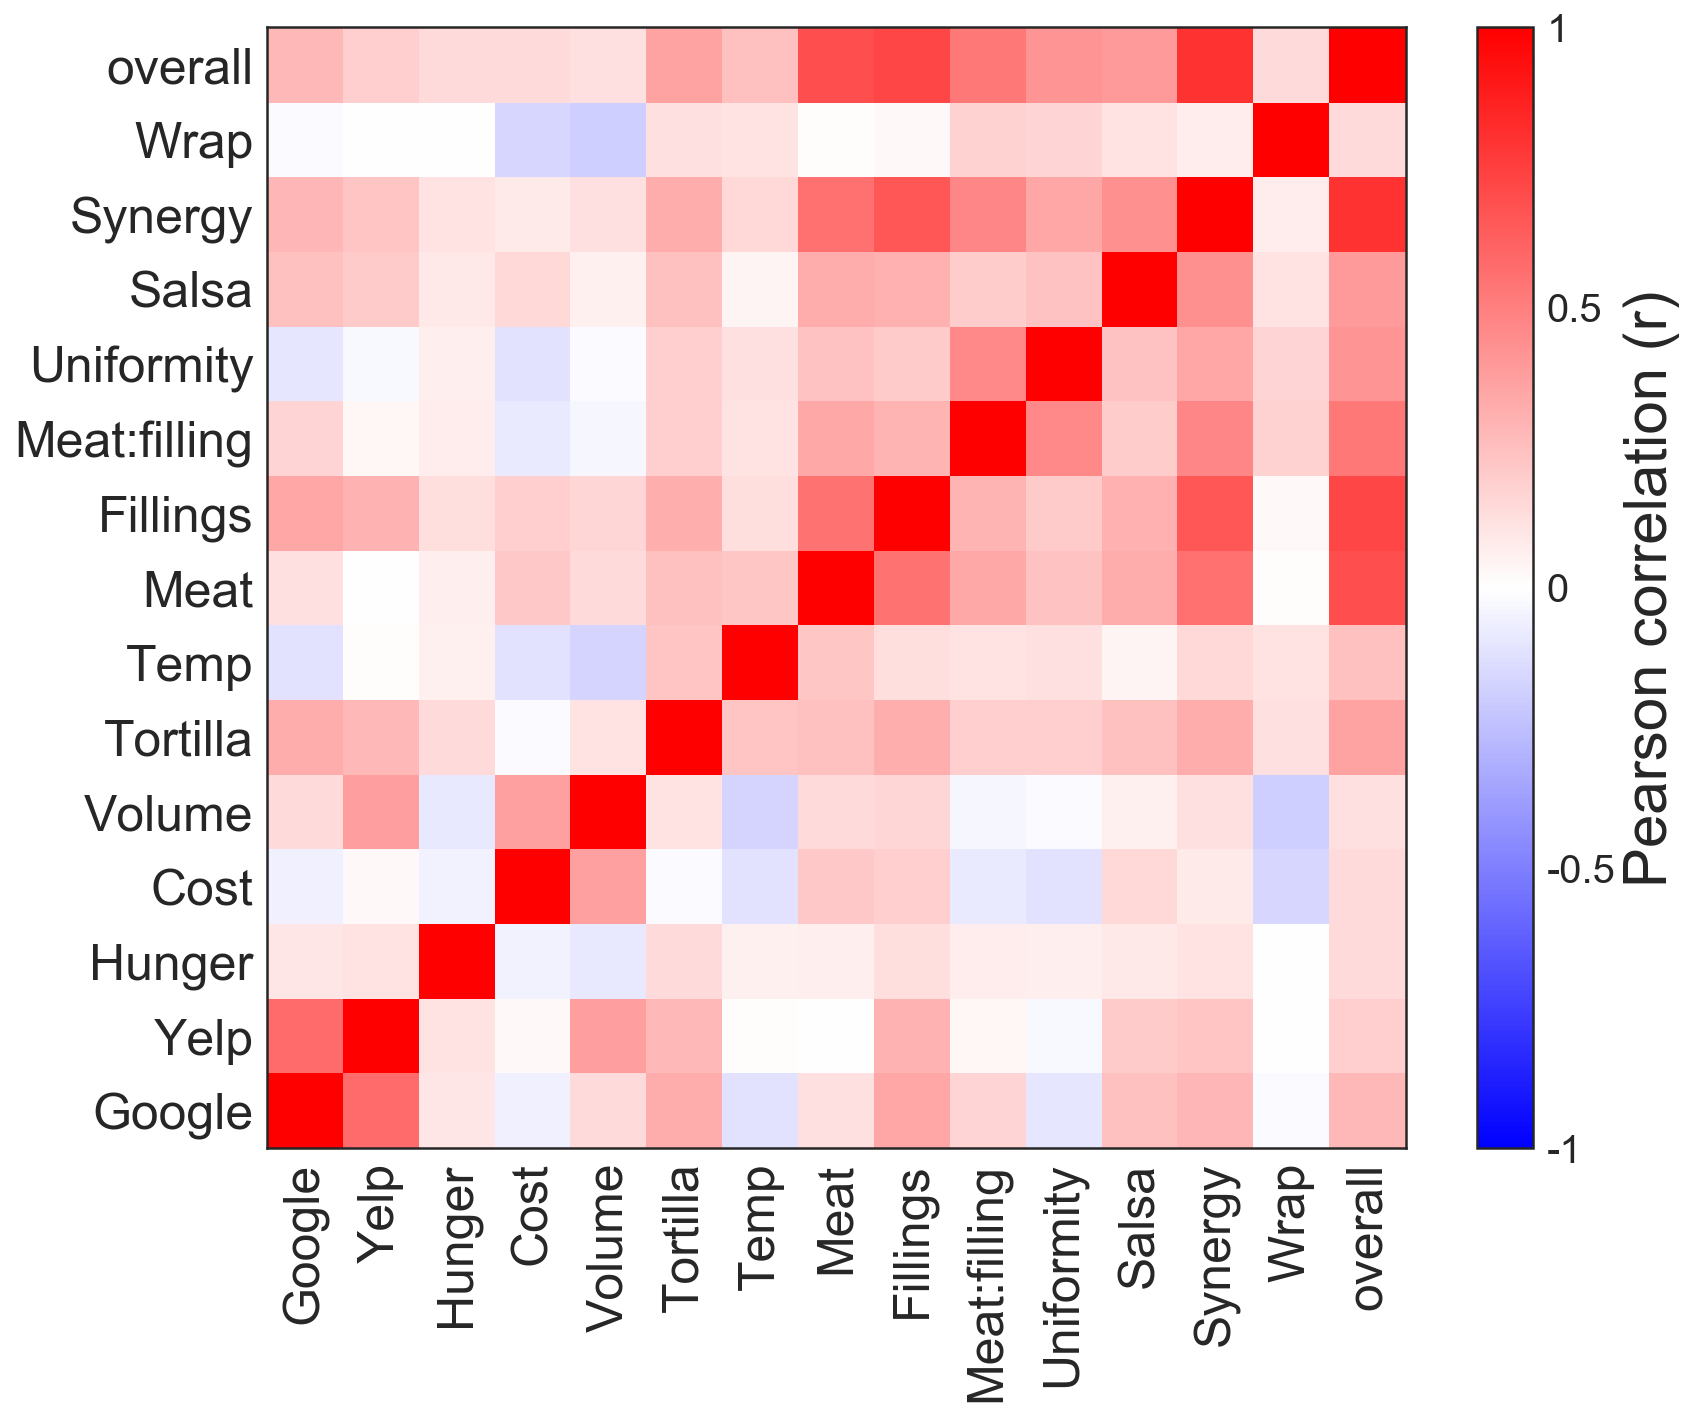

In [5]:
from matplotlib import cm

clim1 = (-1,1)
plt.figure(figsize=(12,10))
cax = plt.pcolor(range(M+1), range(M+1), dfcorr, cmap=cm.bwr)
cbar = plt.colorbar(cax, ticks=(-1,-.5,0,.5,1))
cbar.ax.set_ylabel('Pearson correlation (r)', size=30)
plt.clim(clim1)
cbar.ax.set_yticklabels((-1,-.5,0,.5,1),size=20)
ax = plt.gca()
ax.set_yticks(np.arange(M)+.5)
ax.set_yticklabels(m_corr,size=25)
ax.set_xticks(np.arange(M)+.5)
ax.set_xticklabels(m_corr,size=25)
plt.xticks(rotation='vertical')
plt.tight_layout()
plt.xlim((0,M))
plt.ylim((0,M))

figname = 'metriccorrmat'
plt.savefig('/gh/fig/burrito/'+figname + '.png')

# Correlation: Cost and volume

0.371480497222
1.41971715401e-07


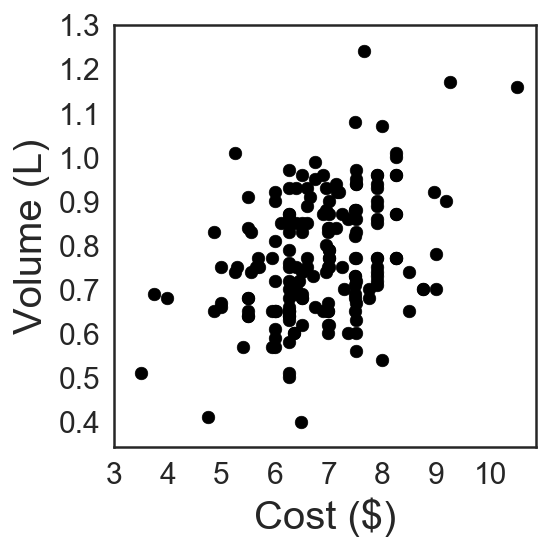

In [10]:
plt.figure(figsize=(4,4))
ax = plt.gca()
df.plot(kind='scatter',x='Cost',y='Volume',ax=ax,**{'s':40,'color':'k'})
plt.xlabel('Cost ($)',size=20)
plt.ylabel('Volume (L)',size=20)
plt.xticks(np.arange(3,11),size=15)
plt.yticks(np.arange(.4,1.4,.1),size=15)
plt.tight_layout()
print(df.corr()['Cost']['Volume'])
from tools.misc import pearsonp
print(pearsonp(df.corr()['Cost']['Volume'],len(df[['Cost','Volume']].dropna())))

figname = 'corr-volume-cost'
plt.savefig('/gh/fig/burrito/'+figname + '.png')

0.142965292846
0.0148250207813


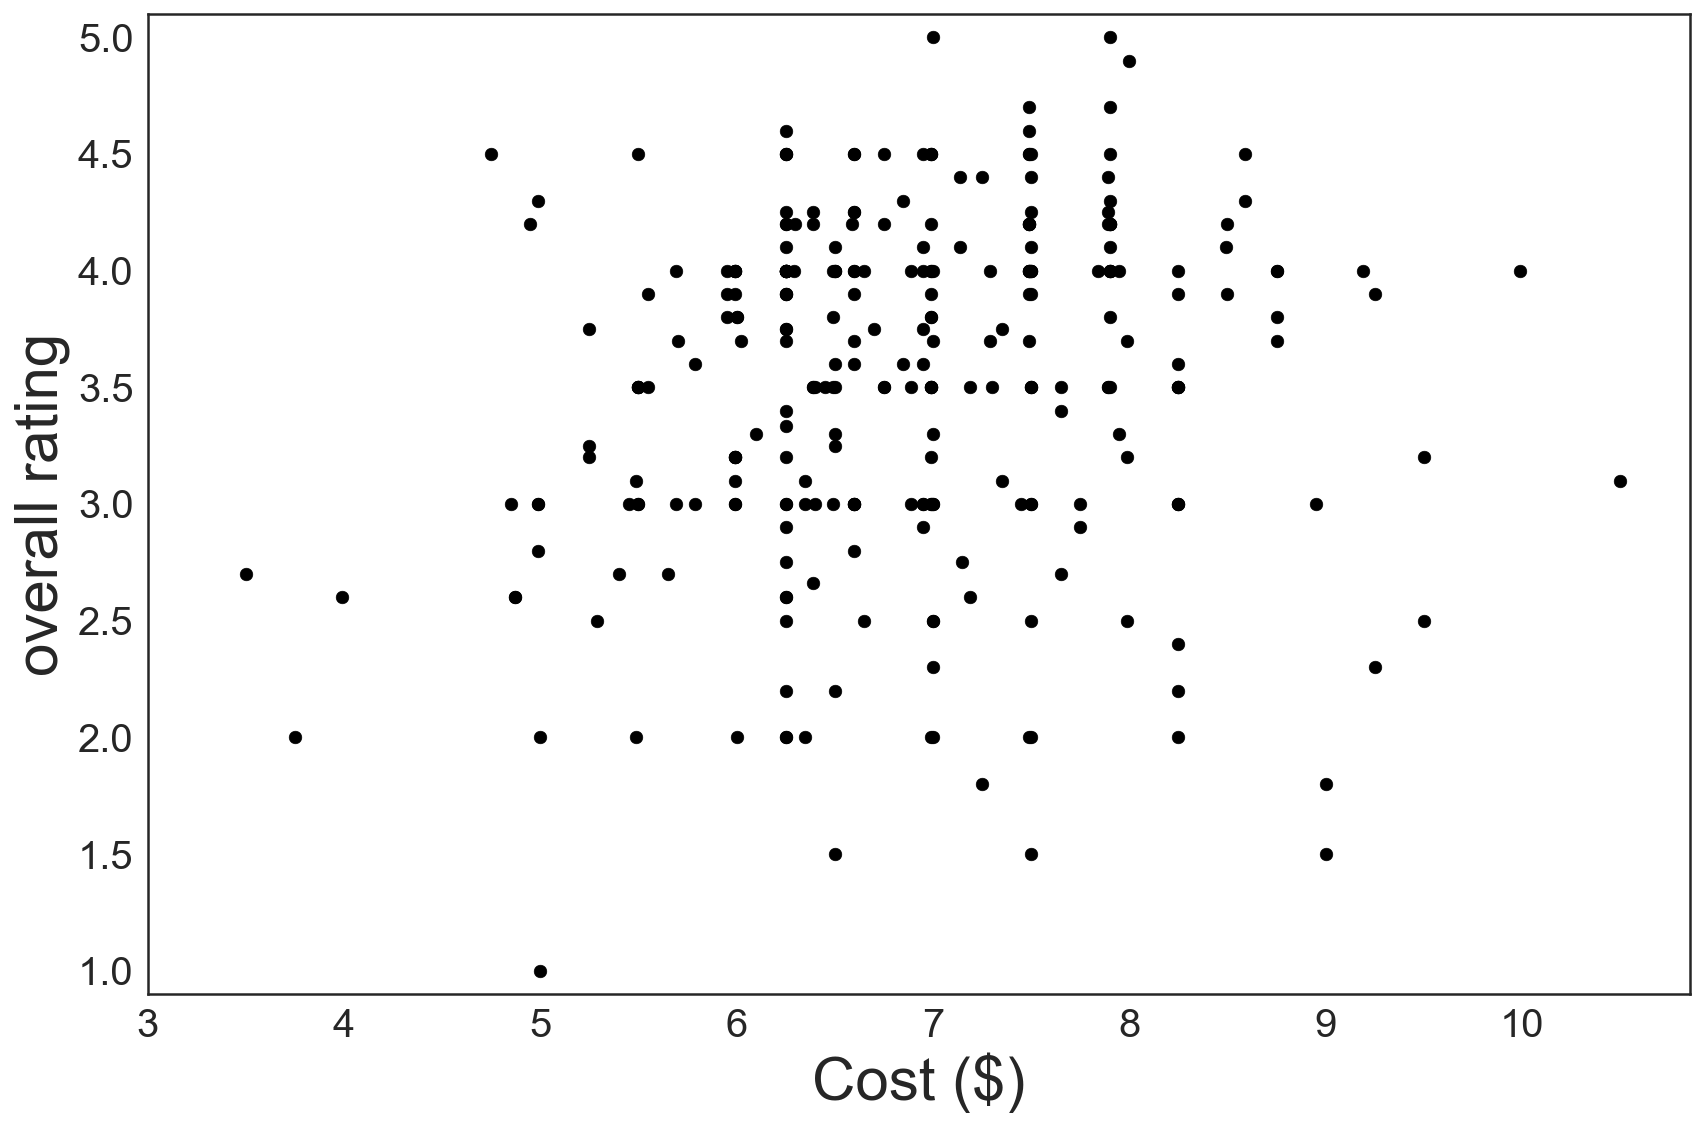

In [18]:
plt.figure(figsize=(12,8))
ax = plt.gca()
df.plot(kind='scatter',x='Cost',y='overall',ax=ax,**{'s':40,'color':'k'})
plt.xlabel('Cost ($)',size=30)
plt.ylabel('overall rating',size=30)
plt.xticks(np.arange(3,11),size=20)
plt.yticks(np.arange(1,5.5,.5),size=20)
plt.ylim((.9,5.1))
plt.tight_layout()
print(df.corr()['Cost']['overall'])
print(pearsonp(df.corr()['Cost']['overall'],len(df[['Cost','overall']].dropna())))


figname = 'corr-overall-cost'
plt.savefig('/gh/fig/burrito/'+figname + '.png')

# Positive correlation: Meat and overall rating

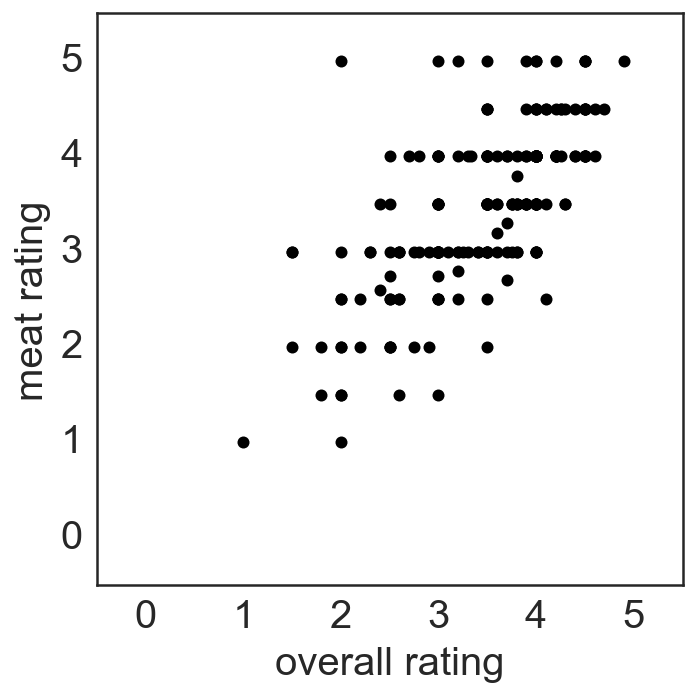

In [6]:
# Visualize some correlations

from tools.plt import scatt_corr
scatt_corr(df['overall'].values,df['Meat'].values,
          xlabel = 'overall rating', ylabel='meat rating', xlim = (-.5,5.5),ylim = (-.5,5.5),xticks=range(6),yticks=range(6))
          #showline = True)
figname = 'corr-meat-overall'
plt.savefig('C:/gh/fig/burrito/'+figname + '.png')

# Positive correlation: Meat and Non-meat fillings

SpearmanrResult(correlation=0.55081047430218921, pvalue=6.7082170494519449e-18)


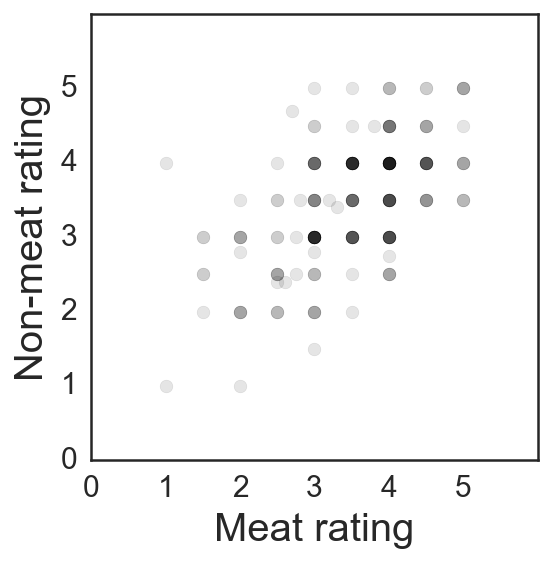

In [7]:
plt.figure(figsize=(4,4))
ax = plt.gca()
df.plot(kind='scatter',x='Meat',y='Fillings',ax=ax,**{'s':40,'color':'k','alpha':.1})
plt.xlabel('Meat rating',size=20)
plt.ylabel('Non-meat rating',size=20)
plt.xticks(np.arange(0,6),size=15)
plt.yticks(np.arange(0,6),size=15)
dfMF = df[['Meat','Fillings']].dropna()
print sp.stats.spearmanr(dfMF.Meat,dfMF.Fillings)

figname = 'corr-meat-filling'
plt.savefig('C:/gh/fig/burrito/'+figname + '.png')

# Positive correlation: Meat and non-meat fillings at The Taco Stand
The positive correlation here indicates that the correlation between these two features is not simply due to a restaurant having good meat tending to have good non-meat fillings

In [8]:
# Restrict analysis to burritos at the taco stand
restrictCali = False
import re
reTS = re.compile('.*taco stand.*', re.IGNORECASE)
reCali = re.compile('.*cali.*', re.IGNORECASE)
locTS = np.ones(len(df))
for i in range(len(df)):
    mat = reTS.match(df['Location'][i])
    if mat is None:
        locTS[i] = 0
    else:
        if restrictCali:
            mat = reCali.match(df['Burrito'][i])
            if mat is None:
                locTS[i] = 0
temp = np.arange(len(df))
dfTS = df.loc[temp[locTS==1]]

SpearmanrResult(correlation=0.56309537038688517, pvalue=0.007864829565580593)


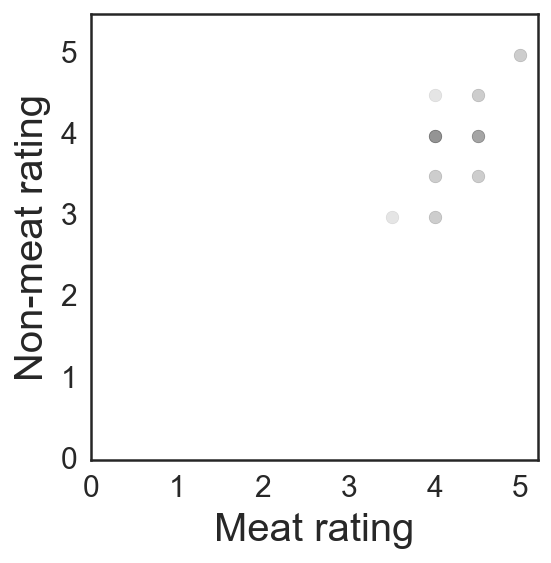

In [9]:
plt.figure(figsize=(4,4))
ax = plt.gca()
dfTS.plot(kind='scatter',x='Meat',y='Fillings',ax=ax,**{'s':40,'color':'k','alpha':.1})
plt.xlabel('Meat rating',size=20)
plt.ylabel('Non-meat rating',size=20)
plt.xticks(np.arange(0,6),size=15)
plt.yticks(np.arange(0,6),size=15)
dfTSMF = dfTS[['Meat','Fillings']].dropna()
print sp.stats.spearmanr(dfTSMF.Meat,dfTSMF.Fillings)

figname = 'corr-meat-filling-TS'
plt.savefig('C:/gh/fig/burrito/'+figname + '.png')

# Correlation: Hunger level and overall rating

0.161681520474
0.0187687862693


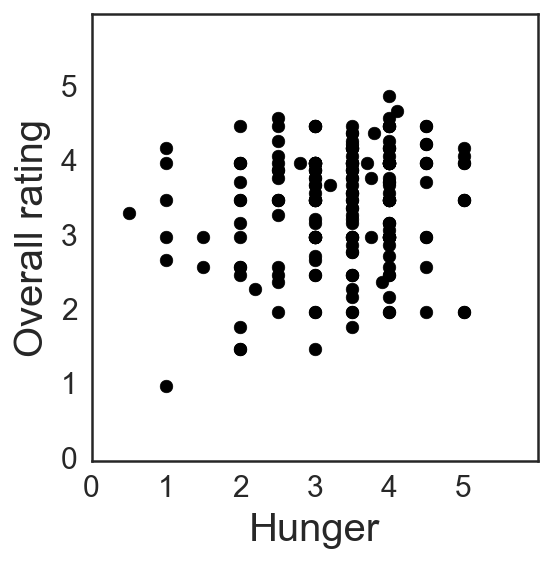

In [10]:
plt.figure(figsize=(4,4))
ax = plt.gca()
df.plot(kind='scatter',x='Hunger',y='overall',ax=ax,**{'s':40,'color':'k'})
plt.xlabel('Hunger',size=20)
plt.ylabel('Overall rating',size=20)
plt.xticks(np.arange(0,6),size=15)
plt.yticks(np.arange(0,6),size=15)
print df.corr()['Hunger']['overall']
from tools.misc import pearsonp
print pearsonp(df.corr()['Hunger']['overall'],len(df[['Hunger','overall']].dropna()))

figname = 'corr-hunger-overall'
plt.savefig('C:/gh/fig/burrito/'+figname + '.png')